In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from warnings import filterwarnings
filterwarnings(action="ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv
/kaggle/input/wine-review-s-eda-recommend-systems/__results__.html
/kaggle/input/wine-review-s-eda-recommend-systems/__resultx__.html
/kaggle/input/wine-review-s-eda-recommend-systems/__notebook__.ipynb
/kaggle/input/wine-review-s-eda-recommend-systems/__output__.json
/kaggle/input/wine-review-s-eda-recommend-systems/custom.css
/kaggle/input/wine-review-s-eda-recommend-systems/__results___files/__results___65_0.png
/kaggle/input/wine-review-s-eda-recommend-systems/__results___files/__results___80_0.png
/kaggle/input/wine-review-s-eda-recommend-systems/__results___files/__results___72_1.png
/kaggle/input/wine-review-s-eda-recommend-systems/__results___files/__results___70_1.png
/kaggle/input/wine-review-s-eda-recommend-systems/__results___files/__results___22_0.png
/kaggle/input/wine-review-s-eda-recommend-systems/__results___files/__results___53_0.png
/kaggle/input/wine-review-s-eda-recommend-systems/__results___files/__results___59_0.png
/

In [20]:
data=pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


**find null values***

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


# **data analysis**

In [8]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

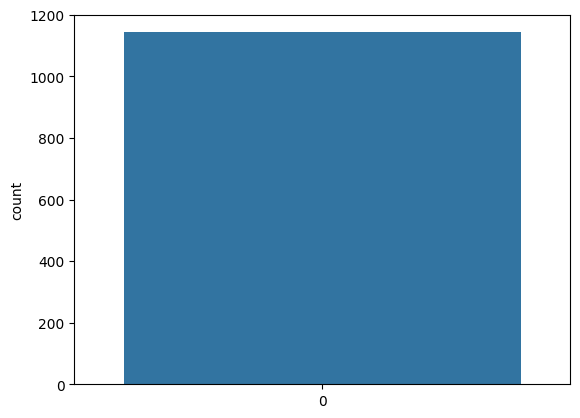

In [33]:
sns.countplot(data['quality'])
plt.show()

<Axes: >

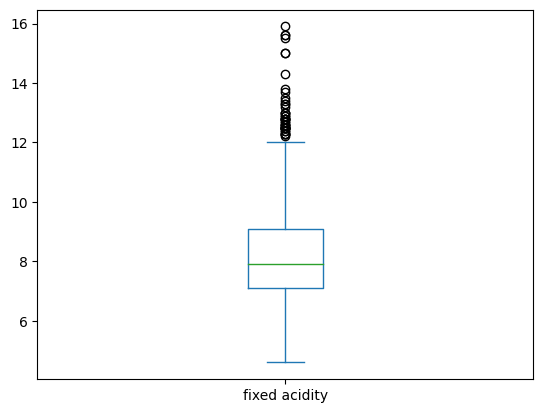

In [24]:
data["fixed acidity"].plot(kind="box")

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'Id'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

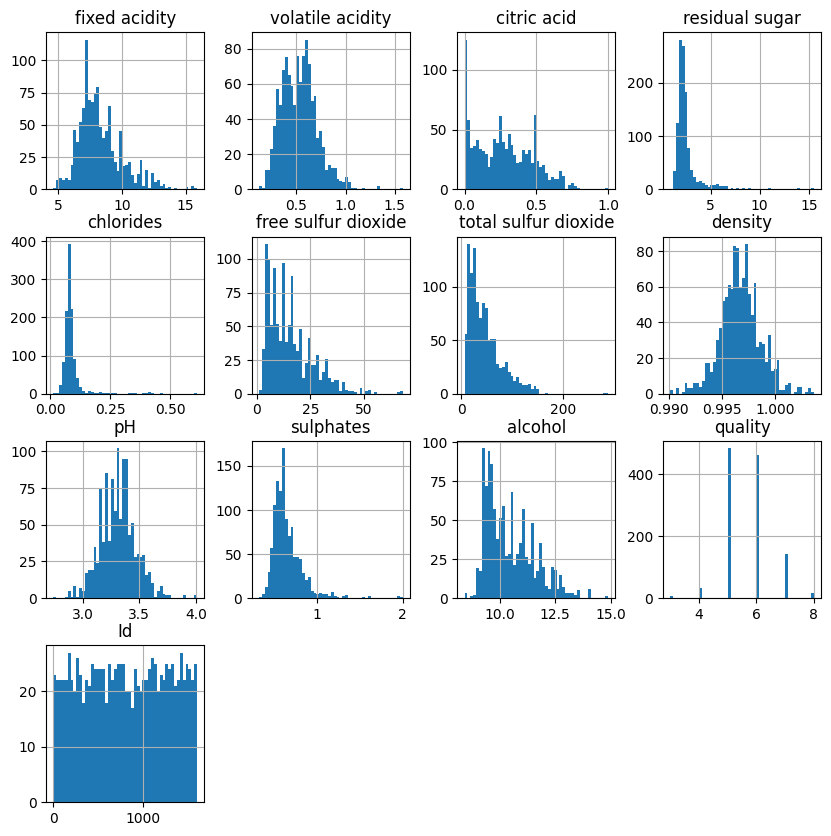

In [26]:
data.hist(figsize=(10,10),bins=50)


In [27]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [29]:
data["good"]=[1 if x>=7 else 0 for x in data["quality"]]

In [30]:
data["good"]

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: good, Length: 1143, dtype: int64

In [31]:
data["good"].unique()

array([0, 1])

In [35]:
data['good'].value_counts()

good
0    984
1    159
Name: count, dtype: int64

In [37]:
X=data.drop(["quality","good"],axis=1)
y=data["good"]

In [39]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

# **Spliting dataset**

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [62]:
res=pd.DataFrame(columns=["model","score"])

In [43]:
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
# accuracy_score(Y_test,Y_pred)

log=accuracy_score(y_test,y_pred)
log


0.8733624454148472

In [63]:
res.loc[0]=[" LogisticRegression",log]
res

,model,score
0,LogisticRegression,0.847162


In [58]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
# accuracy_score(Y_test,Y_pred)

log=accuracy_score(y_test,y_pred)
log

0.8471615720524017

In [64]:
res.loc[1]=["KNeighborsClassifier",log]
res

,model,score
0,LogisticRegression,0.847162
1,KNeighborsClassifier,0.847162


In [66]:
from sklearn.svm import SVC
model =SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
# accuracy_score(Y_test,Y_pred)

log=accuracy_score(y_test,y_pred)
log

0.8602620087336245

In [67]:
res.loc[2]=["SVC",log]
res

,model,score
0,LogisticRegression,0.847162
1,KNeighborsClassifier,0.847162
2,SVC,0.860262


In [69]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
# accuracy_score(Y_test,Y_pred)

log=accuracy_score(y_test,y_pred)
log

0.8864628820960698

In [70]:
res.loc[len(res)]=["DecisionTreeClassifier",log]
res

,model,score
0,LogisticRegression,0.847162
1,KNeighborsClassifier,0.847162
2,SVC,0.860262
3,DecisionTreeClassifier,0.886463


In [71]:
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
# accuracy_score(Y_test,Y_pred)

log=accuracy_score(y_test,y_pred)
log

0.8733624454148472

In [72]:
res.loc[len(res)]=["GaussianNB",log]
res

,model,score
0,LogisticRegression,0.847162
1,KNeighborsClassifier,0.847162
2,SVC,0.860262
3,DecisionTreeClassifier,0.886463
4,GaussianNB,0.873362


In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
# accuracy_score(Y_test,Y_pred)

log=accuracy_score(y_test,y_pred)
log

0.9432314410480349

In [74]:
res.loc[len(res)]=[" RandomForestClassifier",log]
res

,model,score
0,LogisticRegression,0.847162
1,KNeighborsClassifier,0.847162
2,SVC,0.860262
3,DecisionTreeClassifier,0.886463
4,GaussianNB,0.873362
5,RandomForestClassifier,0.943231


In [75]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
# accuracy_score(Y_test,Y_pred)

log=accuracy_score(y_test,y_pred)
log

0.9301310043668122

In [76]:
res.loc[len(res)]=["xgboost",log]
res

,model,score
0,LogisticRegression,0.847162
1,KNeighborsClassifier,0.847162
2,SVC,0.860262
3,DecisionTreeClassifier,0.886463
4,GaussianNB,0.873362
5,RandomForestClassifier,0.943231
6,xgboost,0.930131


In [78]:
res = res.sort_values(by='score', ascending=False)
res

,model,score
5,RandomForestClassifier,0.943231
6,xgboost,0.930131
3,DecisionTreeClassifier,0.886463
4,GaussianNB,0.873362
2,SVC,0.860262
0,LogisticRegression,0.847162
1,KNeighborsClassifier,0.847162
